In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv


In [77]:
df = pd.read_csv('/kaggle/input/air-passenger-data-for-time-series-analysis/AirPassengers.csv')

In [78]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Need to Convert Month into date formate

In [80]:
df['Month'] = pd.to_datetime(df['Month'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [82]:
df = df.set_index(['Month'])

In [83]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [84]:
import matplotlib.pyplot as plt

In [85]:
df.index.year

Int64Index([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
            ...
            1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
           dtype='int64', name='Month', length=144)

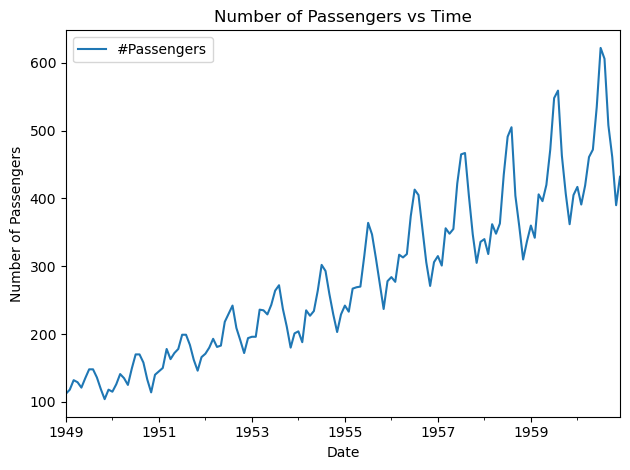

In [86]:
df.plot()
plt.title("Number of Passengers vs Time")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.tight_layout()
plt.show()

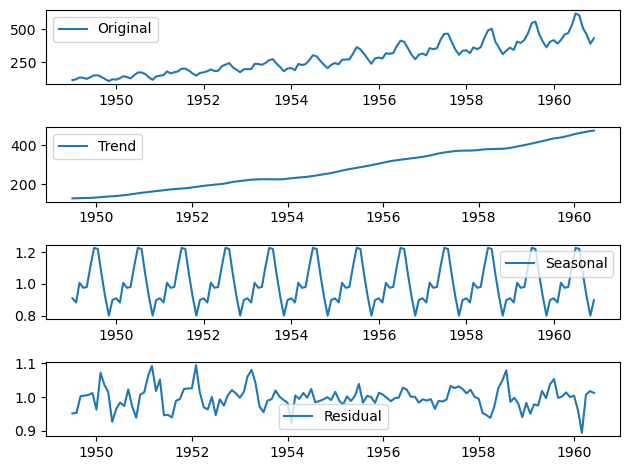

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposed = seasonal_decompose(df, model = 'multiplicative')

# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [89]:
import matplotlib.cm as cm

df['Month'] = df.index.month
df['Year'] = df.index.year

# Get unique years
years = df['Year'].unique()

# Create a colormap for the years
colors = cm.rainbow_r([i / len(years) for i in range(len(years))])

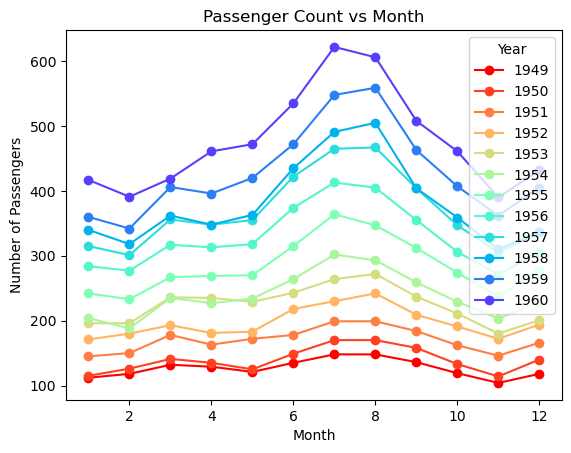

In [90]:
fig, ax = plt.subplots()

for year, color in zip(years, colors):
    data = df[df['Year'] == year]
    ax.plot(data['Month'], data['#Passengers'], label=str(year), color=color, marker='o')

ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.set_title('Passenger Count vs Month')
ax.legend(title='Year')
plt.show()


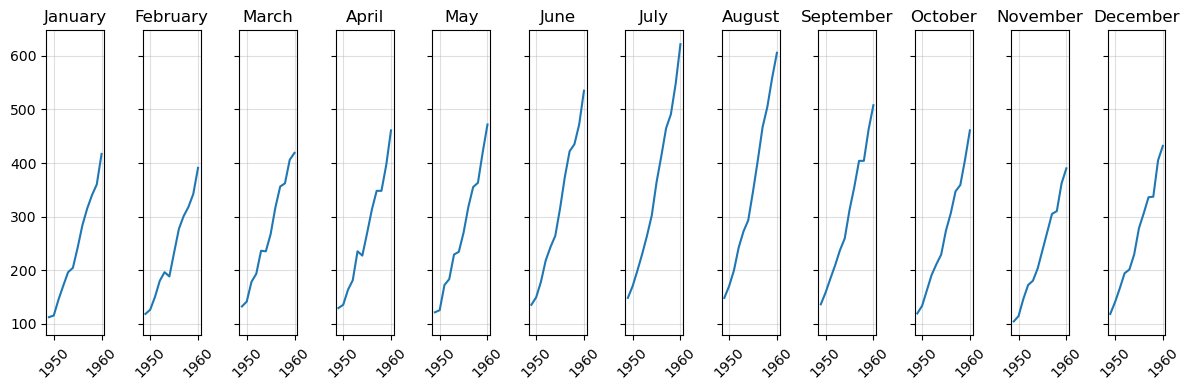

In [91]:
import calendar

fig, axes = plt.subplots(1, 12, figsize=(12, 4), sharey=True)
months = df['Month'].unique()

for i, month in enumerate(months):
    data = df[df['Month'] == month]
    ax = axes[i]
    ax.plot(data['Year'], data['#Passengers'])
    month_name = calendar.month_name[month]
    ax.set_title(month_name)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(alpha = 0.4)


plt.tight_layout()
plt.show()


In [92]:
df

,#Passengers,Month,Year
Month,,,
1949-01-01,112,1,1949
1949-02-01,118,2,1949
1949-03-01,132,3,1949
1949-04-01,129,4,1949
1949-05-01,121,5,1949
...,...,...,...
1960-08-01,606,8,1960
1960-09-01,508,9,1960
1960-10-01,461,10,1960


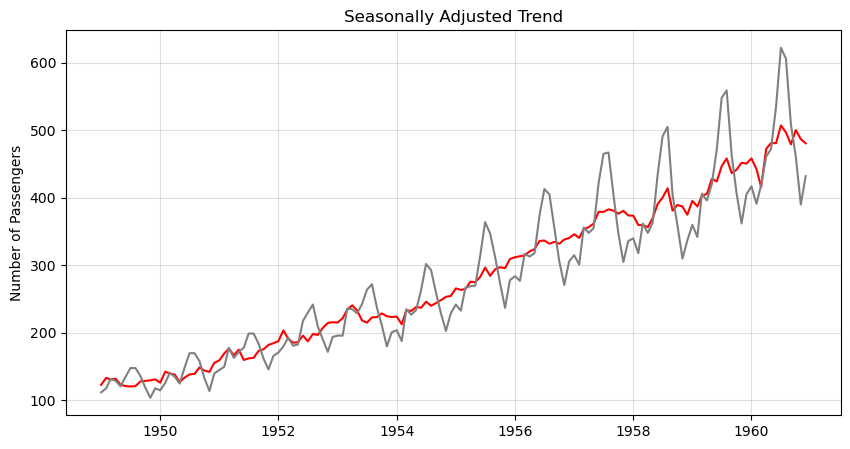

In [93]:
seasonally_adjusted_trend = df["#Passengers"] / seasonal

# Plot the seasonally adjusted trend
plt.figure(figsize=(10, 5))
plt.plot(seasonally_adjusted_trend, color = 'red', label = '')
plt.plot(df.index, df['#Passengers'], color='gray')

plt.ylabel('Number of Passengers')
plt.title('Seasonally Adjusted Trend')
plt.grid(alpha = 0.4)
plt.show()


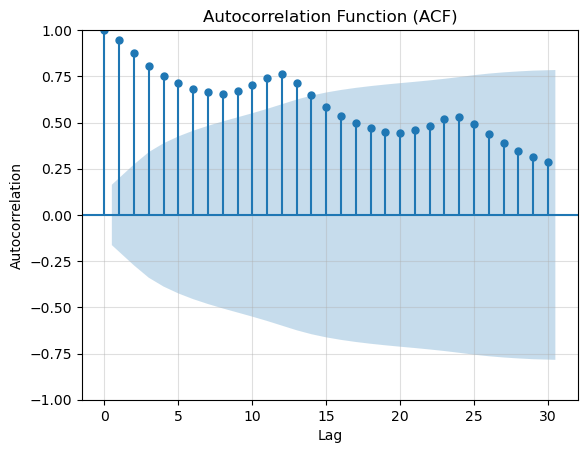

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = df['#Passengers']

# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()


#### There is a seasonal componenet which is very prominent as we can observe from the plot

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


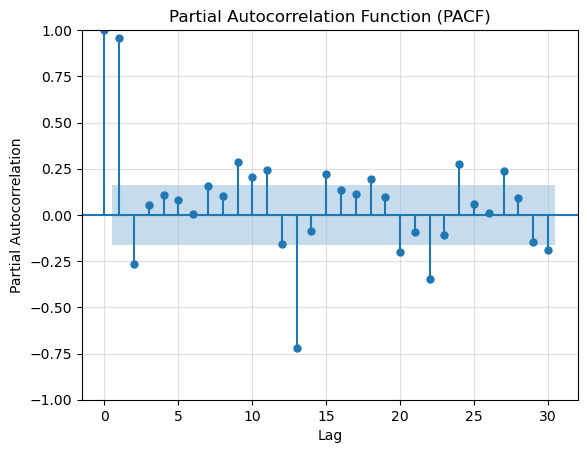

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = df['#Passengers']

# Plot the ACF
plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()


#### The PACF also displays a seasonal component very prominetly present 

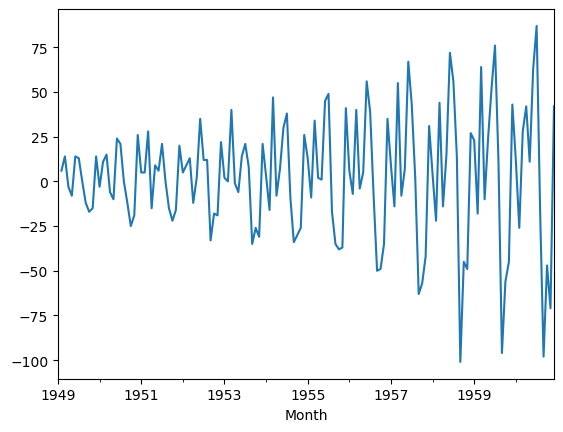

In [96]:
df['#Passengers'].diff().plot()
plt.show()

#### The mean is centred around zero however the variance changes as well as there is clear pattern in the data

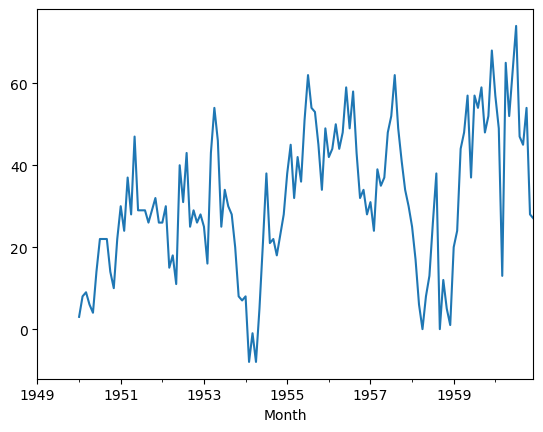

In [97]:
df['#Passengers'].diff(12).plot()
plt.show()

In [98]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df['#Passengers'].diff(12)[12:])

# Extract and print the test statistic
print('Test Statistic:', result[0])

# Extract and print the p-value
print('p-value:', result[1])

# Extract and print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

Test Statistic: -3.383020726492481
p-value: 0.011551493085514952
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


#### The series is stationary

#### We can say the seasonal D is 12

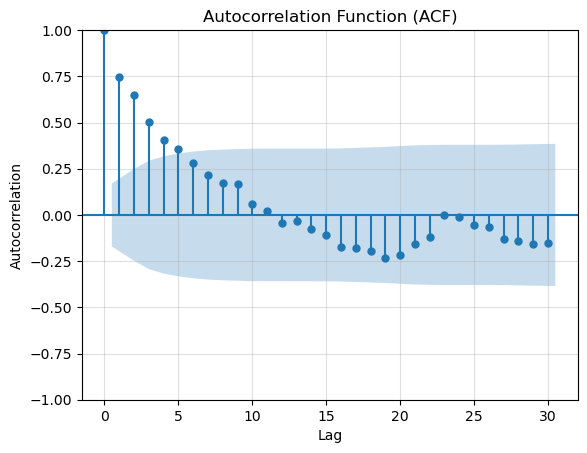

In [99]:
data = df['#Passengers'].diff(12)
data = data[12:]
# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


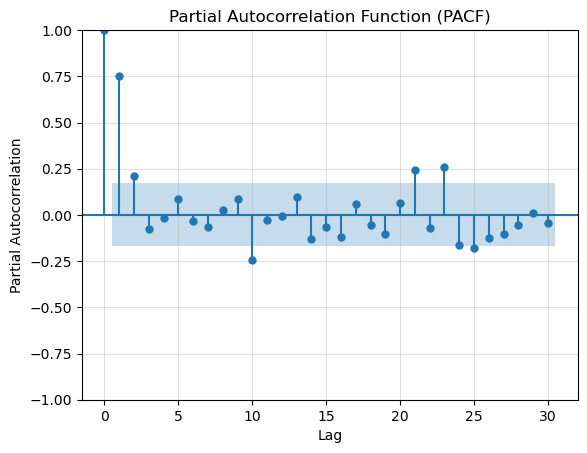

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming you have a DataFrame 'df' with a time series column named 'Data'
data = df['#Passengers'].diff(12)
data = data[12:]

# Plot the ACF
plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()


#### Based on the above plots 

In [101]:
!pip install pmdarima


In [102]:
from pmdarima import auto_arima

In [103]:
arima_model=auto_arima(df["#Passengers"],
                       start_p=1,d=1,start_q=1,
                       max_p=4,max_q=4,max_d=4,m=12,
                       start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       stepwise=True,
                       n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=1.19 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.56 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=1.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.71 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=9.00 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.49 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.78 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.04 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.63 sec
 ARIMA(0,1,1)(1,1,0)[12]     

In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Let's Define Train and Test

In [105]:
df_train = df[:'1958']

In [106]:
df_test = df['1959':]

In [107]:
df_train.index = pd.DatetimeIndex(df_train.index.values,
                               freq=df_train.index.inferred_freq)

In [108]:
model=SARIMAX(df_train["#Passengers"],
             order=(0,1,1),
             seasonal_order=(2,1,0,12),
             seasonal = True,
             m = 12
             )
result=model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32681D+00    |proj g|=  5.38303D-02


 This problem is unconstrained.



At iterate    5    f=  3.32302D+00    |proj g|=  9.29907D-03

At iterate   10    f=  3.32269D+00    |proj g|=  1.13016D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   1.130D-06   3.323D+00
  F =   3.3226948515777961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -398.723
Date:                             Wed, 14 Jun 2023   AIC                            805.447
Time:                                     15:13:32   BIC                            816.138
Sample:                                 01-01-1949   HQIC                           809.781
                                      - 12-01-1958                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2765      0.082     -3.387      0.001      -0.437      -0.117
ar.S.L12      -0.0335      0.091     -0.370      0.712      -0.211       0.144
ar.S.L24       0.1556      0.103      1.504      0.133      -0.047       0.358
sigma2       100.3314     14.511      6.914      0.000      71.890     128.773
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.94   Prob(JB):                         0.84
Heteroskedasticity (H):               1.49   Skew:                             0.12
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
prediction=result.predict(0,len(df)-1)

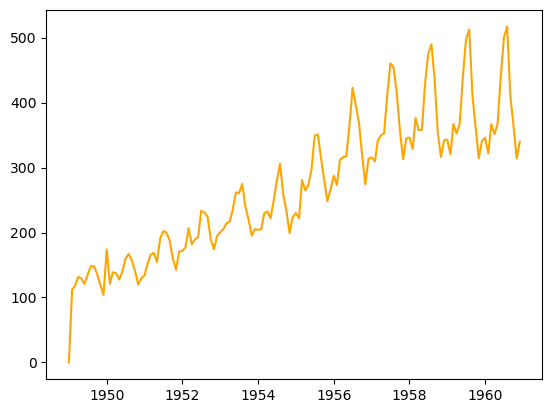

In [110]:
plt.plot(prediction, color= 'orange')
plt.show()

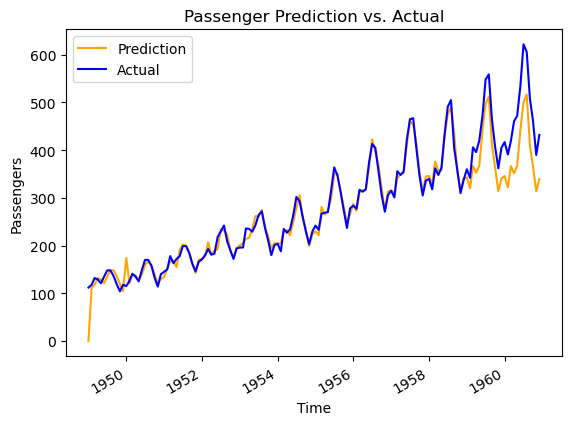

In [111]:
plt.plot(prediction, color='orange', label='Prediction')
df['#Passengers'].plot(color='blue', label='Actual')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Passenger Prediction vs. Actual')

plt.show()
